# OOPaO (Object oriented programming and orbits)

tl;dr nice try, but you gotta read through this one in detail!

## Intro
For today's material, we'll be diving into _object oriented programming_, which is a way of thinking about and writing our programs to make them cleaner and more understandable. The basic idea behind object-oriented programming is to create new data structures, or _objects_, that compartmentalize some functionality that we want to be able to generically use. This requires us to introduce the concept of a **class**, as these are the structures through which new objects are defined. 

We should all be pretty familiar with objects already, as everything that we've been using in python is one! Objects are, as you might guess, things in the code that represent some, well, object. In particular, objects in python will have associated _attributes_,which are variables that define properties of the object, and _methods_, which are functions that allow you to do things with the object. For example, a `numpy` array is an object, and it has an associated set of attributes and methods that we've already used.

In [110]:
import numpy as np

arr = np.zeros((2,2)) # 'initialize' the object
print(arr.shape) # access the shape attribute
print(arr.reshape((1,4))) # use the reshape method

(2, 2)
[[0. 0. 0. 0.]]


As we've seen, using the syntax `<object>.attribute` or `<object>.method()` allows us to access properties of the object and do things to the object. Building a **class** enables us to build custom objects of our own, for whatever our task may be. 

## Classes warm-up
Before we dive into the meat of today's workshop content, let's practice building some classes. In the cell block below, we've defined an example class so you can familiarize yourself with the basic syntax and structure of a class. 

In [116]:
class MyObject(): # this is how we tell the computer we're defining a new class, which will be named `MyObject'
    def __init__(self, attribute): # you always need one of these methods, which is called a constructor
        # within the constructor, we can set some basic attributes that will be associated with the object
        self.attribute = attribute
        
    def method(self): # this is how we define a method in a class
        return self.attribute**2 # in this case, the method squares our attribute

Ok so above, we've defined a new class called `MyObject`, which doesn't really do anything useful at the moment. Note that the first argument of every function within the class needs to be `self`, so that the functions can access all of the class attributes. We can create an object of this class like so:

In [117]:
obj = MyObject(5)

# then we can access the attributes using the same type of dot notation as above:
print(obj.attribute)
print(obj.method())

5
25


Ok that class was pretty basic (and useless), but it's a good illustrative example for how to structure a class. In the cell block below, fill in the missing lines to define a class `Circle`, which takes in the radius and has a method to calculate the area of the circle.

In [118]:
# create the class here
class Circle():
    # create constructor:
    
    # create area method:
    

In [120]:
# we can test that your class works here:
circle1 = Circle(5)
circle1.area()

78.53981633974483

If we check the `type` of our new object, we'll see that we have created a new data type that the computer knows to recognize!

In [163]:
type(circle1)

__main__.Circle

Now let's try to make a class that is more useful in an astronomy context. Define a class `Body` which will characterize (spherical) physical objects for our orbit integrator --- this should take as inputs a name, mass, and radius. Include a method to calculate the density of the object.

In [121]:
# your code here


Let's test this out while also practicing how we can work with units in python. Because we as astronomers work across a wide range of scales in our problems, we tend to work in a variety of different unit systems depending on the problems that we are tackling. As our problems get more complex (and our code more intricate), keeping track of the units and ensuring that everything is kosher can be challenging. There are a variety of ways to effectively do this, but for our purposes we'll use one of the most powerful packages for astronomical python coding: `astropy`. We've already used `astropy` to read in `.fits` files, but now will explore the functionality of its units package. In the block below we've imported the package and done a basic unit conversion for demonstration purposes.

In [131]:
import astropy.units as u
tmp = 3*u.AU # 3 times the distance to the sun
tmp.to(u.km) # convert to kilometers

<Quantity 4.48793612e+08 km>

In [132]:
# to strip the unit from the quantity, use the .value attribute
tmp.value

3.0

Okay, use the astropy unit infrastructure to make sure that everything in your class is in cgs.

In [137]:
# redo the Body class below with unitful calculations


In [138]:
# if everything in your class is defined correctly, 
# you should be able to run this cellblock and get the same output
Earth = Body(mass=1*u.M_earth,
             radius = 1*u.R_earth,
             name='Earth')
Earth.density()

<Quantity 5.49502187 g / cm3>

## orbit integration
Okay now that we've gotten a little familiar with classes, we can go ahead and jump into the good stuff. Our goal for today is to describe the motion of particles in a system in response to their gravitational forces. 

In the simplest version of our orbits problem, we’re going to integrate the n-body problem in physics – that is, the earth moon, or earth moon sun, or solar system. We all know Newton’s famous equations for gravity and acceleration, which allow us to write for some object that
$$F = \frac{GMm}{r^2} = ma \implies \frac{GM}{r^3}\vec{\mathbf{r}} = \vec{\mathbf{a}}$$
where $\vec{\mathbf{r}}$ is the position vector between the object and some other object of mass $M$. The above allows us to calculate the acceleration (magnitude and direction) induced in some object by the gravitational attraction of another object.

If we then apply this to a system of objects, we can use that equation to calculate the mutual gravitational force/acceleration between all the different pairs in our system. Our general procedure will be as follows:
1. Define a collection of objects with known masses, position, and velocity vectors
2. For a given timestep $dt$, we'll calculate the accelerations according to the equation above
3. We'll then use the acceleration to figure out how much each object's velocity changed over $dt$
4. Use our velocities to change the positions of the objects
5. Save these new positions and velocities and start again from step 2.

To do this, we're going to use our knowledge of classes. By defining our own classes, we'll be able to neatly package all the components of our code --- we can create `Body` objects to represent all the objects in our system and then feed all those bodies into a `Simulation` object, where we'll do all the calculations to figure out how the objects will move in response to their mutual gravity.

In the cell below, create a new `Body` class that takes in a name, 3D position vector (e.g., `x = np.array([1,0,0])`), and 3D velocity vector for our object. Make sure that these get converted into cgs units in the class.

In [139]:
# first, some imports
import numpy as np 
import matplotlib.pyplot as plt 
import astropy.units as u 
import astropy.constants as c 
import time

In [140]:
# your class here:
        

Now let's add some methods to this class. Add `return_mass()` and `return_name()` to return the mass and names of the object, respectively. Also, we'll want to associate an overall position and velocity vector with each object, so add a method `return_vec()` which puts the position vector into the first element of a list and the velocity into the second element like so:
$$
\mathbf{y} = \begin{pmatrix}
\vec{\mathbf{x}} \\
\dot{\vec{\mathbf{x}}}
\end{pmatrix}
$$

In [141]:
# your code here

Test your code by running the cell block below. Your output should match what we got for the `return_vec()` method!

In [145]:
Earth = Body(mass=1*u.M_earth,
             x_vec=np.array([0,0,0])*u.km,
             v_vec=np.array([0,10,0])*u.km/u.s,
             name='Earth')
print(Earth.return_vec())
print(Earth.return_name())

[[      0.       0.       0.]
 [      0. 1000000.       0.]]
Earth


Okay, now we can start to build our `Simulation` class. Create this class and have it only take one input, `bodies`, which will be a list of `Body` objects. For example, if our system were the Sun-Earth system, we would set up our simulation like the code block below. Within the constructor (the `__init__` method) you'll need to:
- set an attribute `self.N_bodies` that tells us the number of bodies in our simulation
- set an attribute `self.quant_vec` that combines all the position and velocity vectors for our objects as follows:
$$
y_{\rm system} = 
\begin{pmatrix}
\vec{\mathbf{x}}_1 \\
\dot{\vec{\mathbf{x}}}_1 \\
\vec{\mathbf{x}}_2 \\
\dot{\vec{\mathbf{x}}}_2
\end{pmatrix}
$$
_(hint: it might be useful to consult `np.concatentate` for this)_
- set attributes `self.mass_vec` and `self.name_vec` that are similar

In [147]:
# simulation class here

In [148]:
Earth = Body(name='Earth',
             x_vec = np.array([0,1,0])*u.AU,
             v_vec = np.array([0,30,0])*u.km/u.s,
             mass = 1.0*u.M_earth) 
Sun = Body(name='Sun',
           x_vec = np.array([0,0,0])*u.AU,
           v_vec = np.array([0,0,0])*u.km/u.s,
           mass = 1*u.Msun)

bodies = [Earth,Sun]

my_simulation = Simulation(bodies) 

If everything is ok so far, we should get a `quant_vec` that looks like the following.

In [149]:
my_simulation.quant_vec

array([[0.00000000e+00, 1.49597871e+13, 0.00000000e+00],
       [0.00000000e+00, 3.00000000e+06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Our first method here is going to be a simple setter, which will allow the user (us) to input a separate, externally written function which evaluates the differential equation at hand into our `Simulation`. Why do this? If all you were doing was a gravity-based N-body code, you wouldn’t, you’d just include it in the class. But with this modular set up, we can use our integrator to solve both using traditional N-body gravity as well as using, e.g., gravitational potentials. The actual step of calculating accelerations is different in this case, but we can write our separate solving functions to do this and read it into our `Simulation`. Add the following method to your `Simulation` class

In [150]:
def set_diff_eq(self, calc_diff_eqs, **kwargs):
    '''
    Method which assigns an external solver function as the diff-eq solver for RK4. 
    For N-body or gravitational setups, this is the function which calculates accelerations.
    
    Parameters
    ----------
        calc_diff_eqs: A function which returns a [y] vector for RK4
        **kwargs: Any additional inputs/hyperparameters the external function requires
    '''
    self.diff_eq_kwargs = kwargs
    self.calc_diff_eqs = calc_diff_eqs

What’s going on above? The method takes as an argument a handle or reference to some externally written function which it internally refers to as `calc_diff_eqs`. The method also allows for the entry of keyword arguments, which will come in handy later. Then it just sets class attributes for them so that other methods in the class can access them.

## the integrator
In order to solve these differential equations and evolve our system forward in time, we're going to use an algorithm called Runge-Kutta integration.

For the purposes of this workshop, you don't really need to understand how Runge-Kutta integration works, but the short explanation is that whenever you perform a **numerical integration** (i.e., take a timestep dt, calculate, repeat), you introduce **error** into your positions due to the finite step size you took. This error is reduced with smaller dt's, but this increases how many steps you have to take to integrate the same amount of total time. 

We call an integrater **linear** or **first order** if it is the case that reducing your time step-size by a factor of ten results in a factor of 10 reduction in accumulated error. The method of direct integration, in which the update looks like: 
$$
a = \frac{GM}{r^3}\vec{x}
$$
$$
x_{t+dt} = x_t + v_t(dt) + \frac{1}{2}a(dt)^2
$$
$$
v_{t+dt} = v_t + a(dt)
$$


extrapolates the new position and new velocity from the current position and acceleration. A more clever scheme can actually calculate accelerations/positions at intermediary points between $t$ and $t+dt$. We call these **higher order** schemes, and they are classified by how the accumulated error scales with time step size. Basically, the output of these numerical integrators looks like 

$$
y_{t+dt} = y_t + dt \times \sum_{i=1}^{s} a_i k_i + \mathcal{O}(dt^{s+1})
$$

That is, each new position is the old position plus $dt$ times some update which carries with it some error which scales with some power of the timestep. A scheme (like rk4 -- which we will be using today) is considered fourth order because each step has an error that scales with $\mathcal{O}(dt^{-5})$, and an accumulated error across all steps that scales as $\mathcal{O}(dt^{-4})$. 

### the algorithm
Here is the formula for rk4 (where $f$ is the function that gives us the time derivative of our position and velocity vectors):

$$
\begin{array}{l}k_{1}=dt\times f\left(t_{n}, y_{n}\right) \\ k_{2}=dt\times f\left(t_{n}+\frac{dt}{2}, y_{n}+\frac{k_{1}}{2}\right) \\ k_{3}=dt\times f\left(t_{n}+\frac{dt}{2}, y_{n}+\frac{k_{2}}{2}\right) \\ k_{4}=dt\times f\left(t_{n}+dt, y_{n}+k_{3}\right)\end{array}
$$

where the above are combined to return the next $y$ vector as follows: 

$$
\begin{aligned} y_{n+1} &=y_{n}+\frac{1}{6}\left(k_{1}+2 k_{2}+2 k_{3}+k_{4}\right) \\ t_{n+1} &=t_{n}+dt \end{aligned}
$$

You can think of the $k$'s (with the dt multiplication) as being estimates for the new $y$, which are progressively more refined.

- The $k_1$ is actually just what you would get from a first order, direct integration. It is the timestep multiplied by the evaluation of the differential equation at t and $y_n$ (the generalized vector). 
- Next, $k_2$ is an estimate for $y$, but this time at the half-step mark in time, $dt/2$ and at the position ($y_n + k_1/2$). That is, at half the distance predicted by the first-order step. 
- Next, $k_3$ evaluates the diff equation $t+dt/2$ but at the position ($y_n + k_2/2$), half the distance estimated by the previous step. 
- Finally, $k_4$ is the evaluation of the diff eq at the full timestep dt, at the $k_3$ position. 

These then get added together but in a weighted way, as described by the algorithm.

### a quick demonstration
In the cells below, let's try to use this algorithm for a simple differential equation, the **simple harmonic oscillator** (which describes, for example, the motion of a spring). The equation of motion for this system is:
$$
\ddot{x} = -\omega^2 x
$$

which can be separated into two equations:

$$
\frac{dx}{dt} = \vec{v}
$$

$$
\frac{d\vec{v}}{dt} = -\omega^2 x
$$

The framework for a rk4 method is given below --- fill in the missing pieces according to the algorithm above.

In [155]:
def rk4(t,dt,y,evaluate):
    '''
    Given a vector y with [x,xdot], calculate the new y for step dt,
    using rk4 method
    
    - note that 'evaluate' is our f(t, y), which tells us how our positions and velocities change
    '''
    k1 = dt * evaluate(t, y)
    k2 = dt * evaluate(t + 0.5*dt, _______)
    k3 = dt * evaluate(_______, _______)
    k4 = dt * evaluate(_______, y + k3)
    
    y_new = y + (1/6.)*(k1+ 2*k2 + 2*k3 + k4)
    return y_new

For a simple harmonic oscillator, the evaluation function looks something like this:

In [164]:
def evaluate_SHO(t,y,omega=1):
    '''
    evaluate the SHO at time t and y=y. 
    '''
    v = y[1] # remember the vector y is [x, xdot]
    a = -omega**2 * y[0] 
    return np.array([v,a])

That should be all the pieces we need! Let's try it out in the cell below, where we'll set up a very simple integration. We've already set this up for you but read through the lines and check that what's happening makes sense to you.

In [156]:
# Running a small integration

y_0 = np.array([-5,0]) #initialize oscillator at x = -5, with 0 velocity. 
history = [y_0]
ts = [0]
dt = 0.01
T = 10
nsteps = int(T/dt)
t=0
for i in range(nsteps):
    y_new = rk4(t,dt,history[-1],evaluate_SHO)
    history.append(y_new)
    t = ts[-1] + dt
    ts.append(t)
history = np.array(history)
ts = np.array(ts)

We know the real (read, not numerical) solution to this problem; we should find velocities and positions that look like:
$$
x(t) = - 5\cos(t)
$$

$$
v(t) = 5\sin(t)
$$

In [ ]:
analytical_solution = -5*np.cos(ts)
analytical_velocity = 5*np.sin(ts)
fig, ax = plt.subplots(2,1,figsize=(12,6),sharex=True)
ax[0].plot(ts,history[:,0],color='C0',lw=6,ls='--',label='Position (rk4)',alpha=0.5)
ax[0].plot(ts,analytical_solution,color='r',label='Analytical Solution')
ax[1].plot(ts,history[:,1],color='C1',lw=6,alpha=0.5,ls='--',label='Velocity (rk4)')
ax[1].plot(ts,analytical_velocity,'C2',label='Analytical Solution')
ax[0].legend(loc="upper center")
ax[1].legend(loc="upper center")
ax[-1].set_xlabel('time')

## back to the orbits
The output from the rk4 is a weighted average of several calculated estimates for amount our system evolves in dt (in this case, how far our particles move). As a reminder, we're solving 2 diff eqs here, 
$$
\frac{d\vec{x}}{dt} = \vec{v}
$$
$$
\frac{d\vec{v}}{dt} = \vec{a}
$$
So, our solved vector has these two results stacked on top of each other so we can do it simultaneously. Because $f$ is stacked velocities and accelerations, multiplying by $dt$ produces positions and velocities (our normal $y$ vector). 

- Define a method for your `Simulation` class called `rk4` which takes in `self`,`t`, and `dt` as parameters. Then, calculate all the $k$ values and generate a new $y$ vector. Your method will make calls to whatever the current ``self.quant_vec`` variable is. 

In [ ]:
def rk4(self,t,dt):
    '''
    RK4 integrator. Calculates the K values and returns a new y vector
    --------------------------------
    Params:
        t: a time. Only used if the diff eq depends on time (gravity doesn't).
        dt: timestep. Non adaptive in this case
    '''
    k1 = dt * self.calc_diff_eqs(t, self.quant_vec, self.mass_vec,**self.diff_eq_kwargs) 
    k2 = # your code here!
    k3 = # your code here!
    k4 = # your code here!
    y_new = # your code here

    return y_new

Next, you'll want to add a `run()` method to your simulation class. We've given you the shell of the method (with some documentation to describe what it should do) and you should fill it in accordingly.

Within your ``run()`` method, go through and repeat the procedure of converting the inputs into cgs units and then stripping the units to leave numbers

Once that's done, we need to calculate the number of steps in our simulation. This is simply given by 

$$
N_{\rm steps} = \frac{T-t_0}{dt},
$$
coerced to be an integer. Generally we're ok starting at t=0 in our simulation, but you could imagine having an actual starting time for some reason.

- In your ``run()`` method, calculate nsteps, the number of steps needed to integrate for time (T-t0) with stepsizes of dt. 
- Set up the ``history`` attribute which will store all the `y` vectors we calculate so we can visualize the orbits later. Start it as a list containing the initial vector, `quant_vec`. 
 - Then, write a for-loop that says for i in range(nsteps), ``new_y`` is the output of our rk4 method evaluated for ``rk4(0,dt)``. Append this `new_y` to the `history`, and then overwrite `quant_vec` to be `new_y`. 
 
You might be wondering why we run our rk4 with the arguments (0,dt). Isn't the first argument supposed to be some time $t$? 

This is actually a quirk of our particular problem. See, the diff-eq at hand, for $\ddot{x}$, does not depend on time. It only depend on mass and position. It's common for diff eqs to depend on time as well, and our code is set up to handle that. But, as we'll discover in a moment, the $t$ values that get plugged into our ``calc_diff_eqs`` function (in the calculation of each k) actually get thrown out within the actual acceleration calculation because they're not needed. If you *did* need them though, you'd have them.

In [ ]:
def run(self,T,dt,t0=0):
    '''
    Method which runs the simulation on a given set of bodies.
    
    Parameters
    ----------
        T: total time (in simulation units) to run the simulation.
        dt: timestep (in simulation units) to advance the simulation. Same as above
        t0 (optional): set a non-zero start time to the simulation.

    Returns
    -------
        None, but leaves an attribute history accessed via 
        'simulation.history' which contains all y vectors for the simulation. 
        These are of shape (Nstep, Nbodies * 2, 3), so the [x, y, z] positions of particle 1 are
        simulation.history[:,0], while the same for particle 2 are
        simulation.history[:,2]. Velocities are similarly extractable.
    '''
    

## The Acceleration Calculation

None of what we've talked about within our integrator so far has had any physics involved -- only diff eq work. It's now time to actually compute the accelerations as needed by our `rk4()` integrator. This is going to be the external function that gets read into our `Simulation`, and will be different depending on the problem.

In *principle*, calculating the accelerations between the bodies at each time step is trivial --- simply apply Newton's law. In *practice* this gets a little annoying, because recall, all our objects are stored in a vector that looks like 

$$
y = \left(\begin{matrix} x_1 \\ \dot{x}_1 \\ x_2 \\ \dot{x}_2 \\ x_3 \\ \dot{x}_3 \\ \end{matrix}\right)
$$

So we need some funky indexing to extract each body's values. Since it is pretty unintuitive to set this up, the function is provided below

In [ ]:
def nbody_solve(t,y,masses):
    N_bodies = int(len(y) / 2)
    solved_vector = np.zeros(y.shape)
    for i in range(N_bodies): # for every body
        ioffset = i*2
        for j in range(N_bodies): # iterate over every other body to calculate acceleration
            joffset = j*2
            solved_vector[ioffset] = y[ioffset+1] # set new 'positions' to be old velocities (will later be multiplied by dt)
            if i != j:
                dr = y[ioffset] - y[joffset] # this will be [dx, dy, dz] between body i and body j
                r = np.sqrt(np.sum(dr**2)) # radial distance between the two bodies
                a = ((-c.G.cgs * masses[j] / r**3) * dr).value # acceleration due to gravity
                solved_vector[ioffset+1] += a # add contributions to accel from all the other objects           
    return solved_vector 

Okay, what the heck is going on up there? 

We should first point out that what this spits out, `solved_vector`, is different than the $y$-vectors we've been working with. We can call this an $f$-vector. This is a vector needed by our `rk4()` solver, whose job it is to calculate positions from **velocities and accelerations**. So, you'll notice as you follow along that while the vector input to this function looks like, e.g., 
$$
y = \left(\begin{matrix} x_1 \\ \dot{x}_1 \\ x_2 \\ \dot{x}_2 \\ x_3 \\ \dot{x}_3 \\ \end{matrix}\right)
$$
the output vector should look like 

$$
f = \left(\begin{matrix} \dot{x}_1 \\ \ddot{x}_1 \\ \dot{x}_2 \\ \ddot{x}_2 \\ \dot{x}_3 \\ \ddot{x}_3 \\ \end{matrix}\right)
$$

That is, velocities and accelerations. Here's the function above:

**First**, notice that `nbody_solve()` reads in some time `t`, despite never using one. This is related to the `rk4()` quirk above --- since this diff eq has no time dependence, it's just a dummy variable. 

**Second**: We find the number of bodies, which is given by the length of the array divided by 2 (the number of indices belonging to each body in the list). I then set up an empty ``solved_vector`` array that is the right size to take in new calculated values.

**Third**: We iterate over the bodies with a `for-loop`, and set a ticker variable `ioffset` to be `i*2`. This allows us to index the $i^{th}$ body with indices 0 and 1 relative to the offset of that body with respect to the total array. Again, 2 because each body has 2 indices of information. 

**Fourth**: We iterate over the bodies **again** in an inner `for-loop`, because we need to calculate the acceleration on each body by each other body. This is why direct N-body solvers are slow, and scale as $O(N^2)$. You can't get around calculating each pairwise acceleration (without making some shortcuts). The first thing we do in this second for loop is make sure `i!=j`, that is, don't calculate the acceleration of object a on object a. Not only is that not needed (there is none), it also causes a divide by 0 lower down if we allow it. 

**Fifth**: Finally, physics. We get the $\vec{x}$ vector by subtracting the appropriate x, y, and z components of the positions between the $i^{th}$ and $j^{th}$ object, use those to get the total distance vector, and use the two of them to calculate the components of the acceleration. We strip some units (since we're using `astropy`'s G), and then **add to** the appropriate indices of the solved vector the calculated accelerations. That `+=` is important. Remember, the **total** acceleration (magnitude and direction) felt by object $a$ is simply the sum of all the individual acceleration vectors from the other objects.

**Remember**, no matter what diff-eq you're trying to solve with your integrator, the rk4 will want these quantities in this form. 

Combine everything into a complete `Simulation` object below:

In [162]:
# complete simulation object here

## the big test
Over the course of this tutorial, we've built up a powerful, fourth order integrater that is also easy to set up and use to solve N-body dynamics. We are actually more or less done at this point. If all has gone well, we should be able to run our simulation like the following, where we've set up the Earth-Moon system. 

In [ ]:
M_moon = (7.347e22*u.kg).cgs
v_moon = np.array([0,1.022,0])*u.km/u.s
moon_momentum = M_moon * v_moon

Moon = Body(mass=M_moon,
           x_vec = np.array([3.84e5,0,0])*u.km,
           v_vec = v_moon,
           name='Moon')

#calculate reciprocal momentum for Earth
v_earth = - (moon_momentum / c.M_earth).to(u.km/u.s).value

Earth = Body(mass=c.M_earth.cgs,
             x_vec=np.array([0,0,0])*u.km,
             v_vec=np.array(v_earth)*u.km/u.s,
             name='Earth')

bodies = [Earth,Moon]

simulation = Simulation(bodies)
simulation.set_diff_eq(nbody_solve)

simulation.run(72*u.day,1*u.hr)

In [52]:
# extract the positions and velocities from the simulation history


In [ ]:
# plot the orbit of the moon around the earth -- exciting, isnt it!
plt.scatter(______, ______, s = 5, color = 'skyblue')
plt.scatter(______, ______, s = 5, color = 'grey')

We could also make things a bit more interesting. Try to set up some sample 3-body systems in the cells below and plot what their orbits look like. Here's an example of the kind of neat stuff you can generate with this:

(-50.0, 50.0)

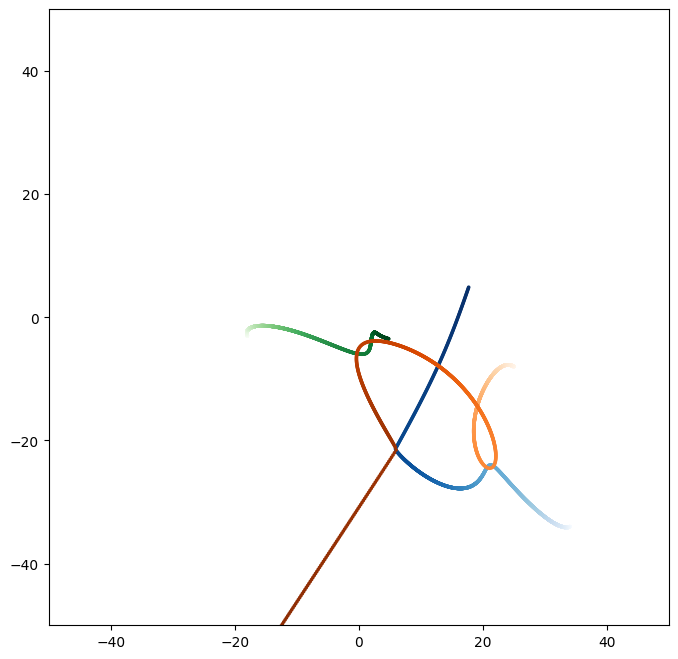

In [106]:
# this plot is for
m1, m2, m3 = 30.9*u.Msun, 32.7*u.Msun, 13.5*u.Msun
v1 = np.array([-4.346, -2.051, 0])*u.km/u.s
v2 = np.array([-1.325, 4.15, 0])*u.km/u.s
v3 = np.array([-6.568, 4.262, 0])*u.km/u.s

x1 = np.array([34, -34, 0])*u.AU
x2 = np.array([-18, -3, 0])*u.AU
x3 = np.array([25, -8, 0])*u.AU